# Pymaceuticals Inc.

------

### Analysis

In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

In [2]:
# Read the mouse data and the study results

mouse_metadata_df = pd.read_csv("Resources/Mouse_metadata.csv")
study_result_df = pd.read_csv("Resources/Study_results.csv")

In [3]:
# Combine the data into a single DataFrame

mouse_metadata_study_result = pd.merge(study_result_df,mouse_metadata_df, how="left", on = "Mouse ID")

# Display the data table for preview

mouse_metadata_study_result.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.

mouse_metadata_study_result["Mouse ID"].nunique()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = mouse_metadata_study_result.loc[mouse_metadata_study_result.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.

duplicated_mouse_data = mouse_metadata_study_result.loc[mouse_metadata_study_result["Mouse ID"] == "g989"]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df = mouse_metadata_study_result[mouse_metadata_study_result['Mouse ID'].isin(duplicates)==False]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stdev=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [10]:
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = {"Mean Tumor Volumes" : tumor_mean,
                      "Median Tumor Volume":tumor_median,
                     "Tumor Volume Variance":tumor_variance,
                      "Tumor Volume Std. Dev.": tumor_stdev,
                      "Tumor Volume Std. Err.": tumor_sem}
summary_statistics = pd.DataFrame(summary_statistics)
summary_statistics

,Mean Tumor Volumes,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = df.groupby("Drug Regimen")["Tumor Volume (mm3)"]\
.agg(["mean","median","var","std","sem"])

agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

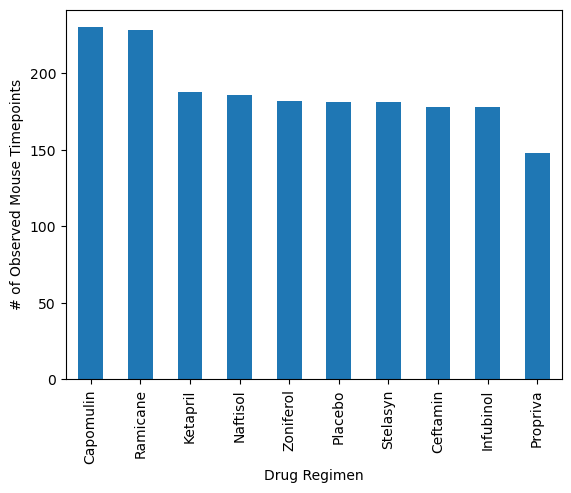

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_drugs=df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_drugs.sort_values(ascending=False, inplace=True)
timepoint_drugs.plot(kind="bar", xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")

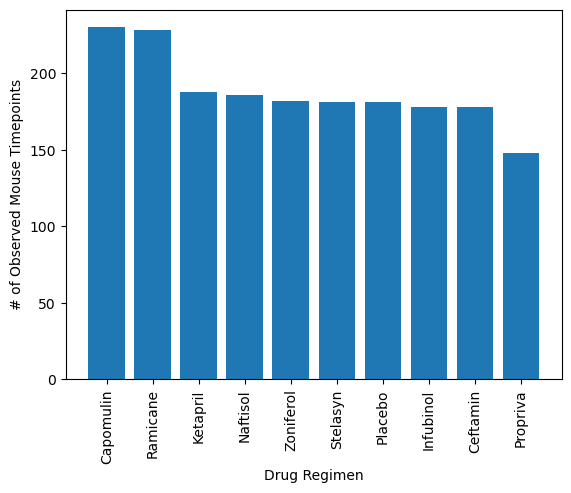

In [13]:
# Generate a bar plot showing the total number of rows 
# (Mouse ID/Timepoints) for each drug regimen using pyplot.

drugs_regimen = df["Drug Regimen"].value_counts()

plt.bar(drugs_regimen.index.values, drugs_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

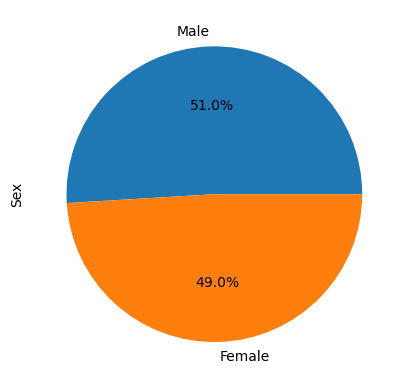

In [14]:
# Generate a pie plot showing the distribution of female versus male
# mice using Pandas

gender=df["Sex"].value_counts()
gender.plot(kind="pie", autopct="%1.1f%%")

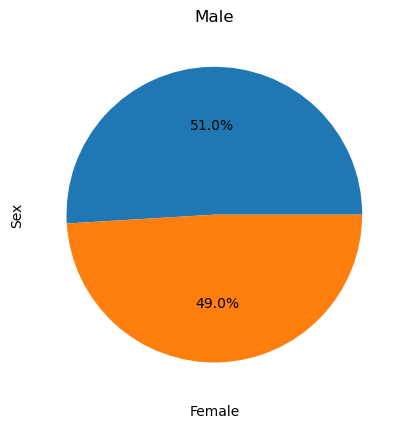

In [15]:
# Generate a pie plot showing the distribution of female versus male mice
# using pyplot

plt.pie(gender, autopct="%1.1f%%")
plt.xlabel("Female")
plt.ylabel("Sex")
plt.title("Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
grouped_df=df.groupby(["Mouse ID"])["Timepoint"].max()
grouped_df=grouped_df.reset_index()
df2=grouped_df.merge(df, on=["Mouse ID","Timepoint"], how="left")


In [17]:
drugs_list = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]
final_tumor_volume_list = []
for drugs in drugs_list:
    final_tumor_volume = df2.loc[df2["Drug Regimen"]==drugs,"Tumor Volume (mm3)"]
    final_tumor_volume_list.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5*(iqr)
    upper_bound = upper_q + 1.5*(iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)|(final_tumor_volume > upper_bound)]
    print(f"{drugs} potential outliers are {outliers}")

Capomulin potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


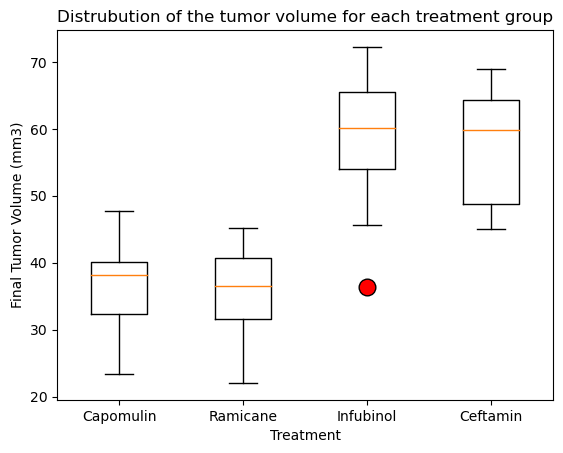

In [18]:
flierprops = dict(markerfacecolor="red", markersize=12)

fig, ax = plt.subplots()
ax.boxplot(final_tumor_volume_list,flierprops=flierprops)
ax.set_title("Distrubution of the tumor volume for each treatment group")
ax.set_xlabel("Treatment")
ax.set_xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol", "Ceftamin"])
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.savefig("Boxplot.png")
plt.show()

## Line and Scatter Plots

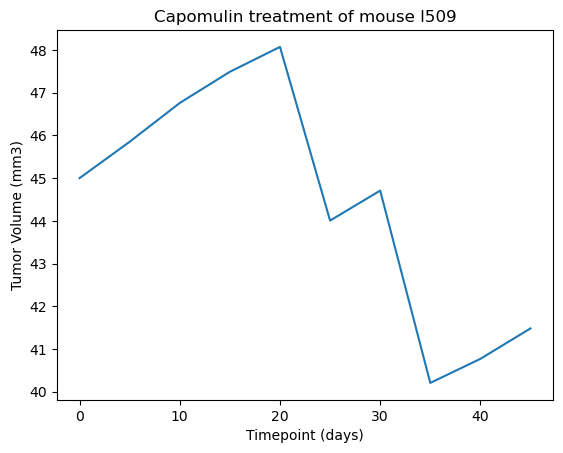

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

cap_data=df[df.iloc[:,4] == "Capomulin"]
mouse_sample=cap_data[cap_data.iloc[:,0] == "l509"]
plt.plot(mouse_sample["Timepoint"], mouse_sample["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

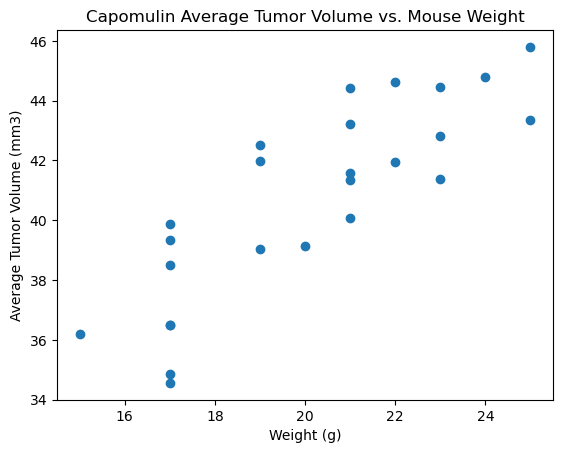

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume
# for the entire Capomulin regimen

cap_avg=cap_data.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the avergae tumor volume is 0.84


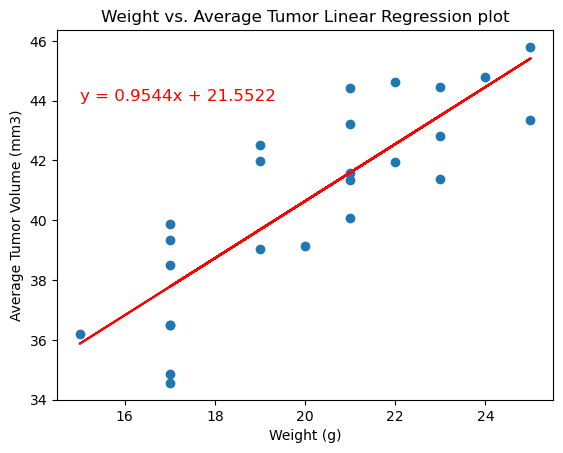

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume 
# for the entire Capomulin regimen

x=cap_avg["Weight (g)"]
y=cap_avg["Tumor Volume (mm3)"]
results=st.linregress(x,y)


correlation = round(results.rvalue, 2)
print(f"The correlation between mouse weight and the avergae tumor volume is {correlation}")

m = round(results.slope,4)
c = round(results.intercept, 4)
y_pred = c + m * x
line_eq=("y = " + str(m) + "x + " + str(c))

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x,y_pred, c="r")
plt.title("Weight vs. Average Tumor Linear Regression plot")
plt.annotate(line_eq,(15,44),fontsize=12,color="r")
plt.savefig("correlation.png")
plt.show()
